In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale = 2)

%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
activation = 'relu'
batch_size = 128
neurons_number = 64
epochs = 20
optimize = 'Adam'

In [4]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                128       
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [5]:
X_train = np.linspace(0, 0.8, num=10000)
Y_train = X_train

In [6]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 4/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 6/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 7/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.00

In [7]:
X_test = np.linspace(0, 0.8, num=333)
Y_test = X_test

loss, mse = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 290us/step - loss: 0.0014 - mse: 0.0014


In [8]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

references = pd.DataFrame({'X': grid, 'Y_reference': grid})
predictions = pd.DataFrame({'X': grid, 'Y_predicted': predicted})

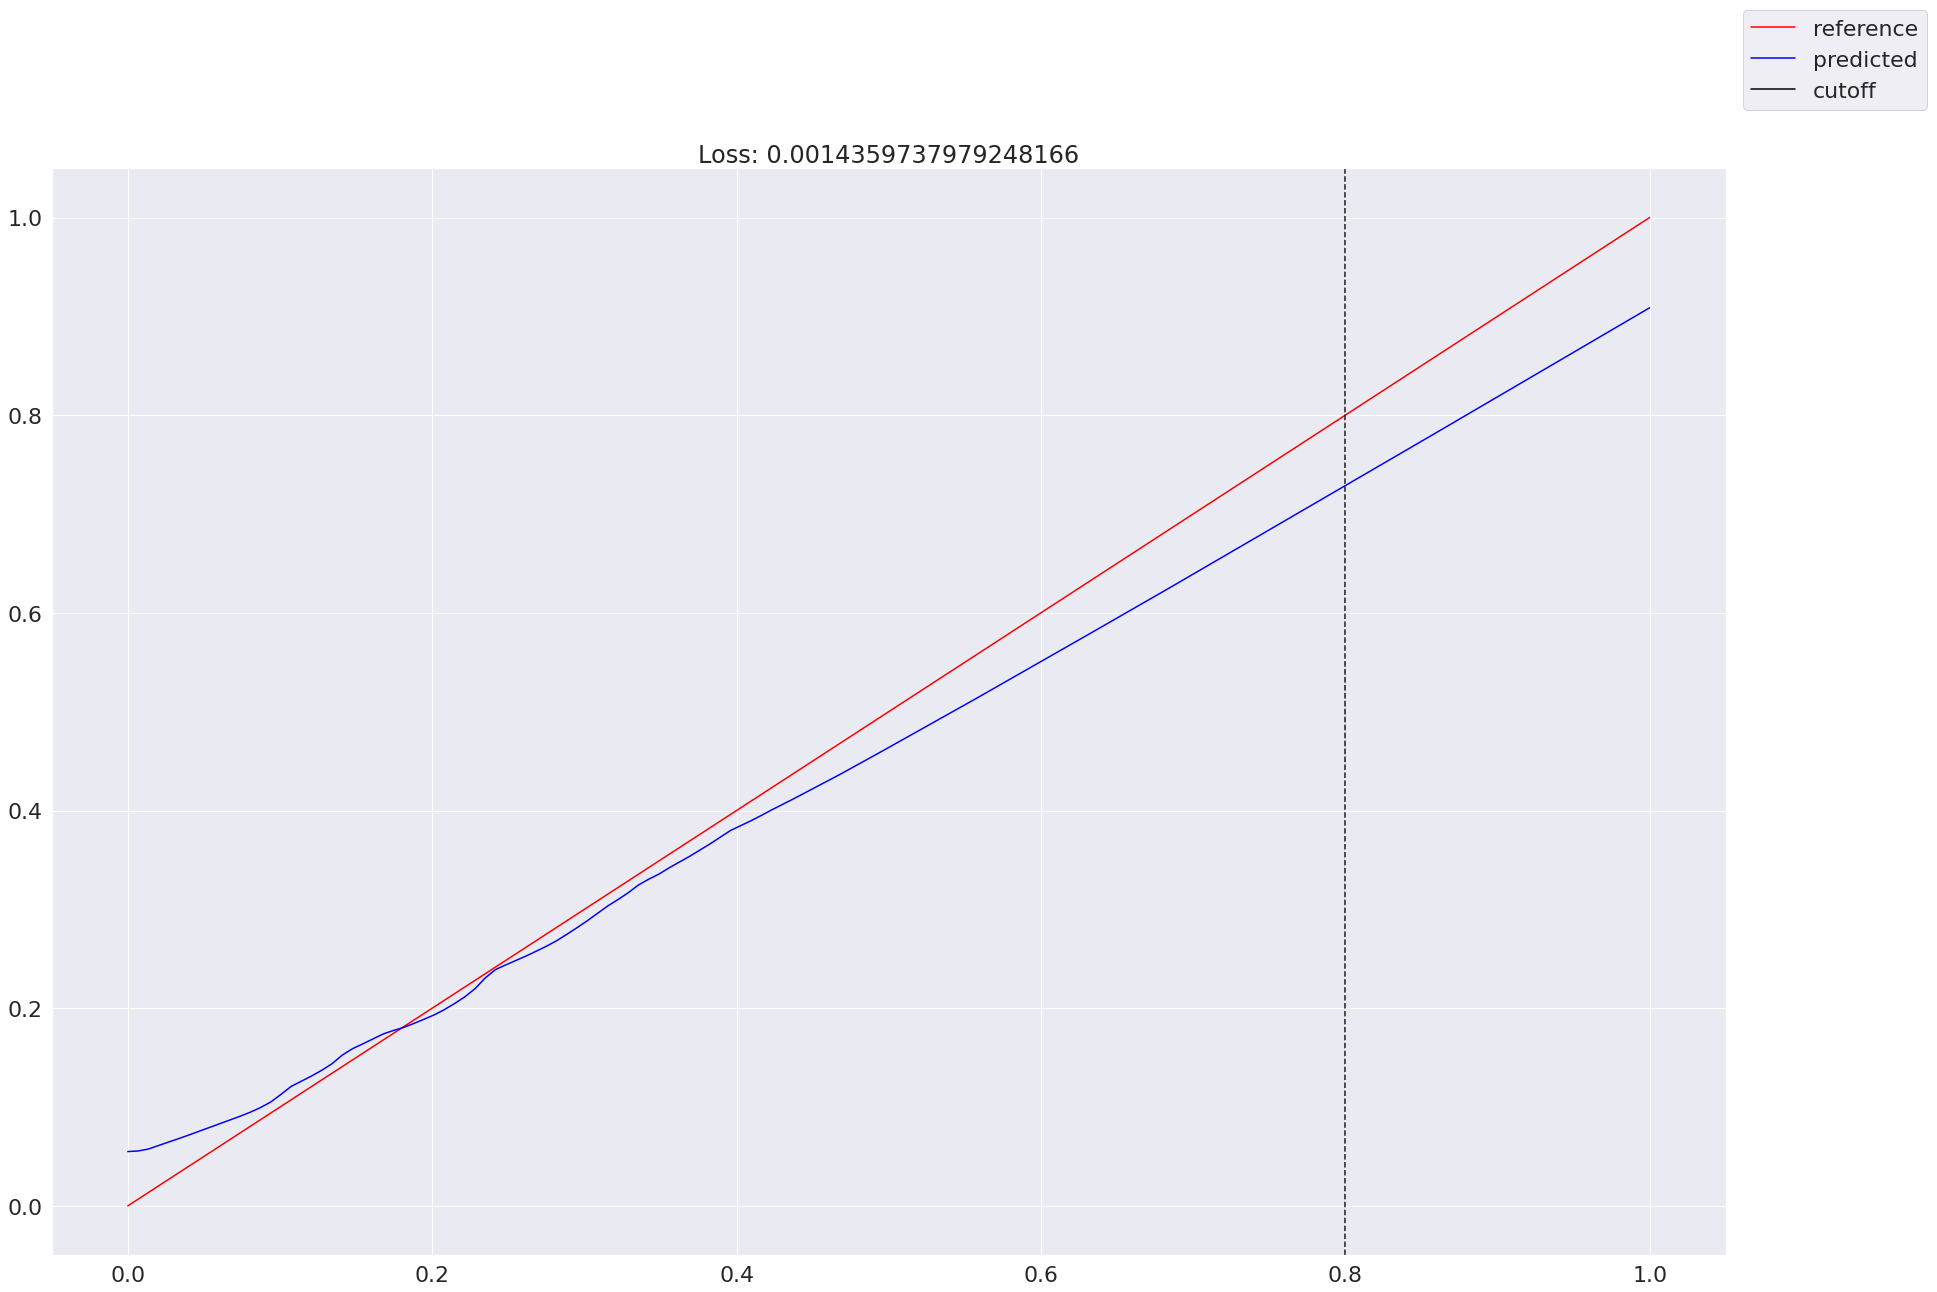

In [16]:
dims = (30, 20)
fig, ax = pyplot.subplots(figsize=dims)
predicted = model.predict(grid).reshape((150,))

sns.lineplot(x=grid, y=grid, color="red")
sns.lineplot(data=predictions, x=grid, y=predicted, color="blue")
sns.lineplot(data=predictions, x=np.ones(150) * 0.8, y=np.linspace(-0.1, 1.1, 150), color="black")
plt.axvline(0.8, color='k', linestyle='--')
ax.set_title("Loss: {}".format(loss))
fig.legend(labels=['reference', 'predicted', 'cutoff'])